# ***Voorspellen van verhuuraantallen 2023*** 

Teamleden:
- Busse Heemskerk
- Declan van den Hoek
- Isa Dijkstra

In dit notebook worden er, aan de hand van een train dataset, verschillende Machine Learning modellen opgesteld om de meest accurate manier te vinden om verhuuraantallen te voorspellen.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_test = pd.read_csv('test.csv', sep = ',')
data_train = pd.read_csv('train.csv', sep = ',')

In [2]:
data_train

,date_hour,holiday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01 00:00:00,0,1,0.24,0.2879,0.81,0.0000,16
1,2011-01-01 01:00:00,0,1,0.22,0.2727,0.80,0.0000,40
2,2011-01-01 02:00:00,0,1,0.22,0.2727,0.80,0.0000,32
3,2011-01-01 03:00:00,0,1,0.24,0.2879,0.75,0.0000,13
4,2011-01-01 04:00:00,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...
16632,2012-11-30 19:00:00,0,1,0.32,0.3485,0.66,0.0000,377
16633,2012-11-30 20:00:00,0,1,0.32,0.3485,0.66,0.0000,245
16634,2012-11-30 21:00:00,0,1,0.30,0.3182,0.75,0.0896,183
16635,2012-11-30 22:00:00,0,1,0.30,0.3333,0.75,0.0000,163


## **H1: Explorative Data Analysis**<a name='h1'></a>

De minimale vereisten voor Machine Learning met Scikit Learn zijn:

- De data mag geen missende waardes hebben
- De data moet bestaan uit numerieke waardes
- De data moet in een dataframe staan

Omdat de data is ingelezen via Pandas staat het al in een Pandas DataFrame, hierdoor kan gebruik gemaakt worden van de .info() methode van DataFrames om te kijken naar missende waarden en de datatypen.

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_hour   16637 non-null  object 
 1   holiday     16637 non-null  int64  
 2   weathersit  16637 non-null  int64  
 3   temp        16637 non-null  float64
 4   atemp       16637 non-null  float64
 5   hum         16637 non-null  float64
 6   windspeed   16637 non-null  float64
 7   cnt         16637 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 1.0+ MB


In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_hour   456 non-null    object 
 1   holiday     456 non-null    int64  
 2   weathersit  456 non-null    int64  
 3   temp        456 non-null    float64
 4   atemp       456 non-null    float64
 5   hum         456 non-null    float64
 6   windspeed   456 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 25.1+ KB


In [5]:
data_train.describe()

,holiday,weathersit,temp,atemp,hum,windspeed,cnt
count,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000
mean,0.028671,1.415580,0.504745,0.482608,0.624756,0.190310,190.477009
std,0.166885,0.637298,0.192369,0.171557,0.193227,0.121915,182.026755
min,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,41.000000
50%,0.000000,1.000000,0.520000,0.500000,0.620000,0.194000,143.000000
75%,0.000000,2.000000,0.660000,0.621200,0.780000,0.253700,282.000000
max,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [6]:
correlaties = data_train.corr()
display(correlaties)

,holiday,weathersit,temp,atemp,hum,windspeed,cnt
holiday,1.000000,-0.019912,-0.026707,-0.030552,-0.013474,0.005341,-0.026586
weathersit,-0.019912,1.000000,-0.093937,-0.097251,0.411523,0.030847,-0.140111
temp,-0.026707,-0.093937,1.000000,0.987475,-0.062933,-0.026461,0.409245
atemp,-0.030552,-0.097251,0.987475,1.000000,-0.046192,-0.063077,0.404820
hum,-0.013474,0.411523,-0.062933,-0.046192,1.000000,-0.284617,-0.327288
windspeed,0.005341,0.030847,-0.026461,-0.063077,-0.284617,1.000000,0.097006
cnt,-0.026586,-0.140111,0.409245,0.404820,-0.327288,0.097006,1.000000


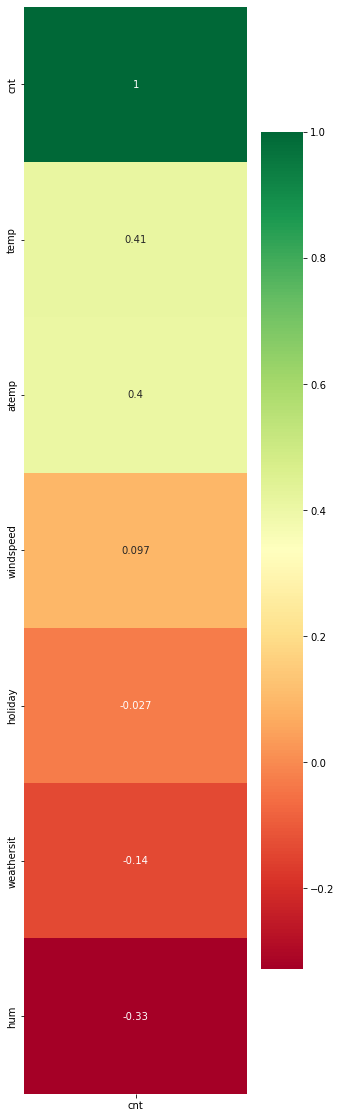

In [7]:
fig, ax = plt.subplots(figsize=(5,20))
ax = sns.heatmap(data_train.corr()[['cnt']].sort_values(by=['cnt'],ascending=False),square=False, annot=True, cmap='RdYlGn')
data_train.sort_index(axis=0, ascending=True)
plt.show()

Aan de hand van deze heatmap kun je zien dat de hum, temp en atemp de meeste invloed hebben op de hoeveelheid die wordt verhuurd. 

In [8]:
df_train = data_train.copy()
df_train.drop('date_hour', axis=1, inplace=True)
#ik heb date_hour verwijderd want her duurde heel lang met runnen en voor de visualisaties die hier onder komen heeft deze geen
#zin. deze heeft wel zin denk ik als we alles bij elkaar voegen want dan hebben we ook periodes. Ik leg dit op school wel ff uit. 

In [9]:
def boxplots(df, kolom):
    """
    Maakt een aantal box plots gelijk aan het aantal kolommen
    in de Dataframe. De box zijn tegen één specifieke kolom
    opgezet, om de verdeling t.o.v. die kolom te tonen.

    Parameters:
    ----------------
    df : Pandas DataFrame
        Een pandas DataFrame met kolommen waarvan je
        de verdeling wilt onderzoeken.

    kolom : str
        De naam van de kolom waarbij de verdeling bekeken
        word, ten opzichte van de andere kolommen.

    Returns:
    ---------------
    None :
        In plaats van iets te returnen laat de
        functie meerdere boxplots zien.
    """

    # For-loop om elke kolom een eigen boxplot te geven
    for col in df.columns:
        # if-statement om te voorkomen dat de
        # kolom-parameter ook een boxplot krijgt
        if col != kolom:
            # Zetten van de grootte van de plot
            plt.subplots(figsize=(15, 5))

            # Maken en benoemen van de assen van de boxplots
            sns.boxplot(x=col, y=kolom,
                        data=df, color='pink')
            plt.xlabel(col)
            plt.ylabel(kolom)
            plt.title('{} vs. {}'.format(kolom, col))
            plt.show()
            
def barplots(df, kolom):
    """
    Maakt een aantal bar plots gelijk aan het aantal kolommen
    in de Dataframe. De bar is tegen één specifieke kolom
    opgezet, om de verdeling t.o.v. die kolom te tonen.

    Parameters:
    ----------------
    df : Pandas DataFrame
        Een pandas DataFrame met kolommen waarvan
        je de verdeling wilt onderzoeken.

    kolom : str
        De naam van de kolom waarbij de verdeling
        bekeken word, ten opzichte van de andere kolommen.

    Returns:
    ---------------
    None :
        In plaats van iets te returnen laat
        de functie meerdere barplots zien.
    """

    # For-loop om elke kolom een eigen barplot te geven
    for col in df.columns:
        # if-statement om te voorkomen dat de
        # kolom-parameter ook een barplot krijgt
        if col != kolom:
            # Zetten van de grootte van de plot
            plt.subplots(figsize=(15, 5))

            # Maken en benoemen van de assen van de barplot
            sns.barplot(x=col, y=kolom,
                        data=df, color= 'skyblue')
            plt.xlabel(col)
            plt.ylabel(kolom)
            plt.title('{} vs. {}'.format(col, kolom))
            plt.show()
            
def lineplots(df, kolom):
    """
    Maakt een aantal line plots gelijk aan het aantal kolommen
    in de Dataframe. De line is tegen één specifieke kolom
    opgezet, om de verdeling t.o.v. die kolom te tonen.

    Parameters:
    ----------------
    df : Pandas DataFrame
        Een pandas DataFrame met kolommen waarvan
        je de verdeling wilt onderzoeken.

    kolom : str
        De naam van de kolom waarbij de verdeling
        bekeken word, ten opzichte van de andere kolommen.

    Returns:
    ---------------
    None :
        In plaats van iets te returnen laat
        de functie meerdere lineplots zien.
    """

    # For-loop om elke kolom een eigen barplot te geven
    for col in df.columns:
        # if-statement om te voorkomen dat de
        # kolom-parameter ook een barplot krijgt
        if col != kolom:
            # Zetten van de grootte van de plot
            plt.subplots(figsize=(15, 5))

            # Maken en benoemen van de assen van de barplot
            sns.lineplot(x=col, y=kolom,
                        data=df, color= 'green')
            plt.xlabel(col)
            plt.ylabel(kolom)
            plt.title('{} vs. {}'.format(col, kolom))
            plt.show()

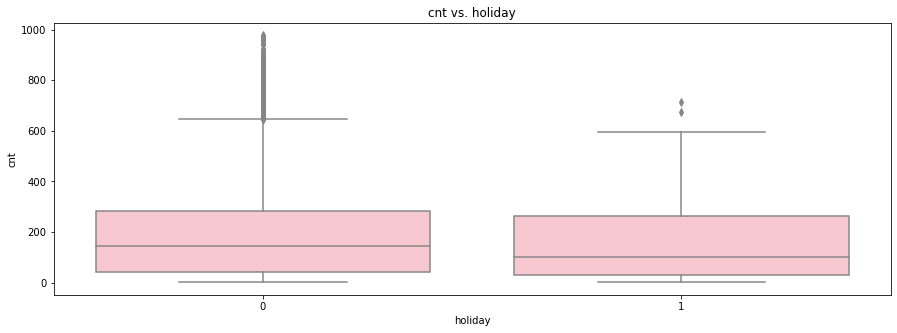

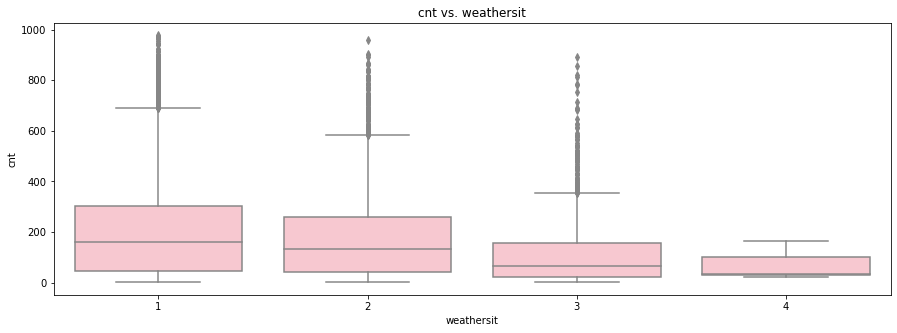

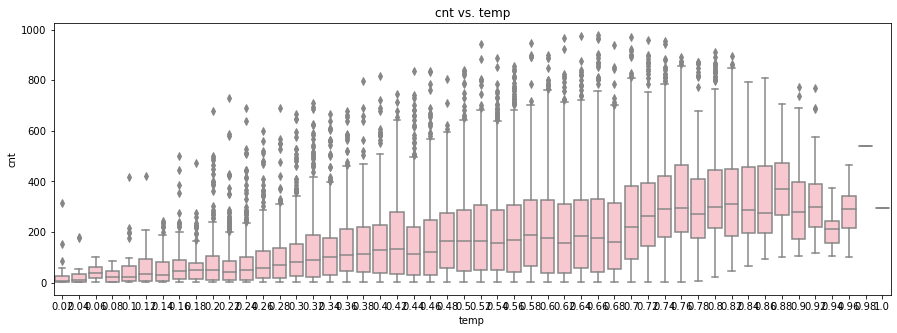

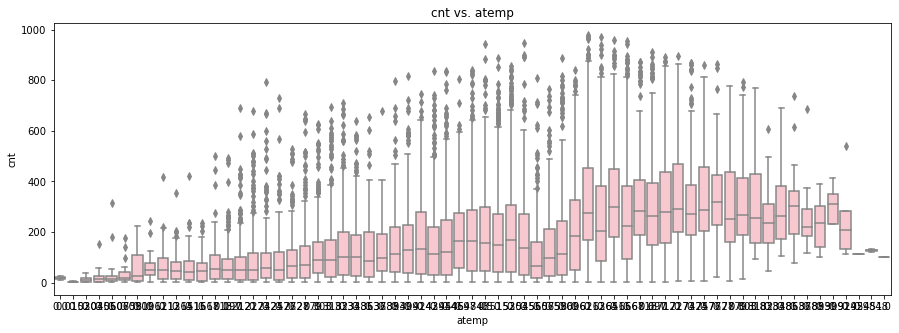

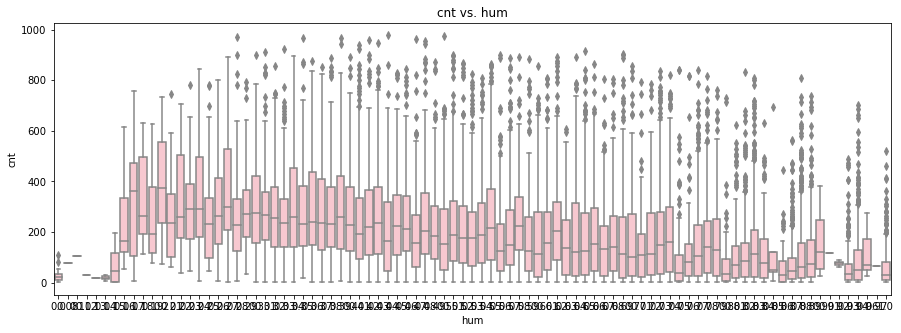

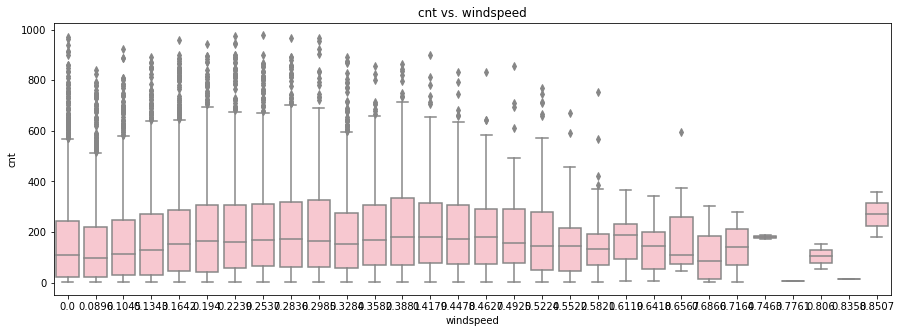

In [10]:
boxplots(df_train, 'cnt')

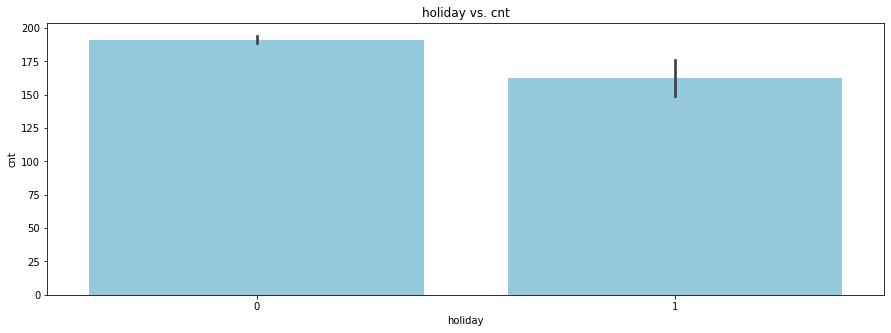

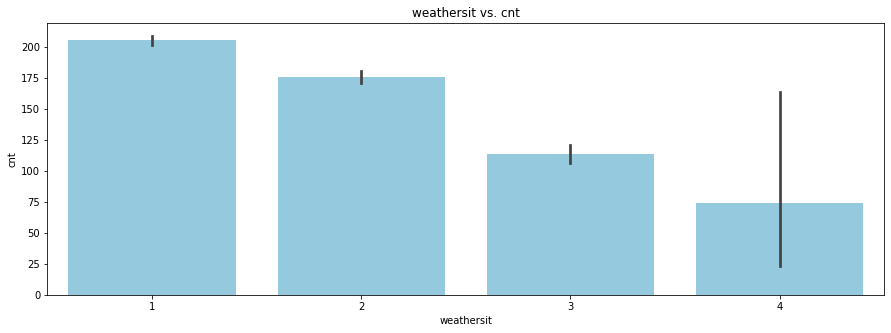

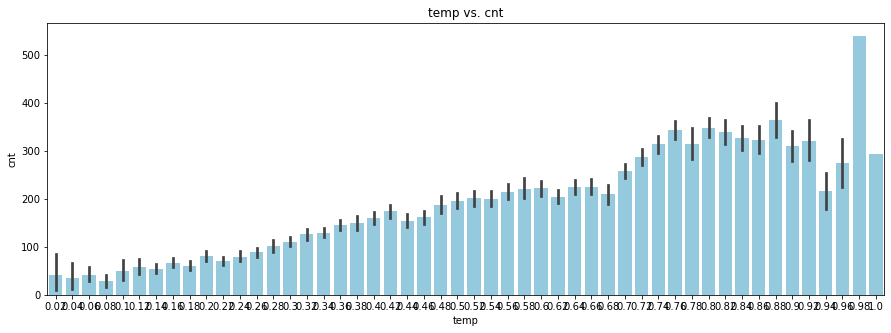

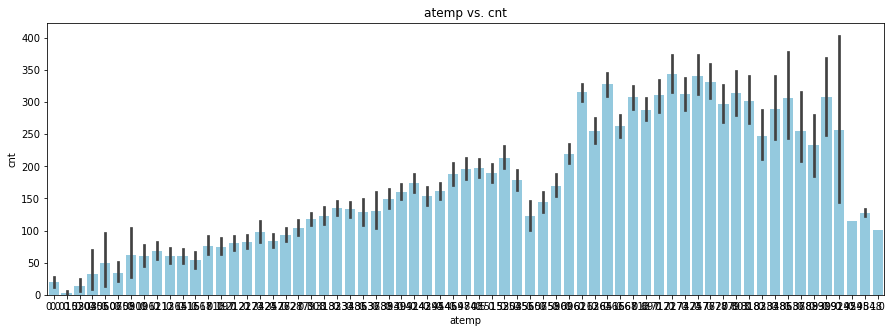

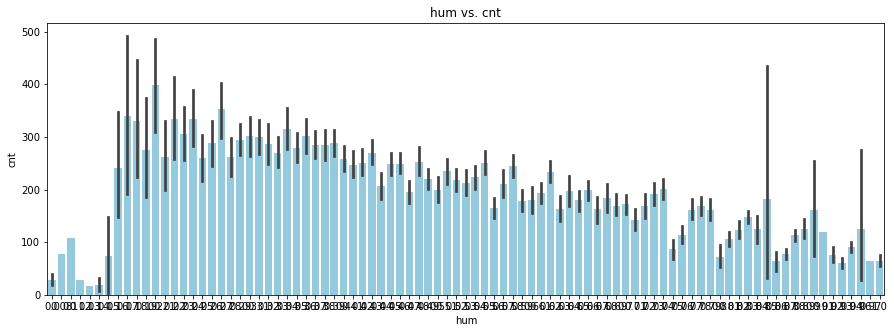

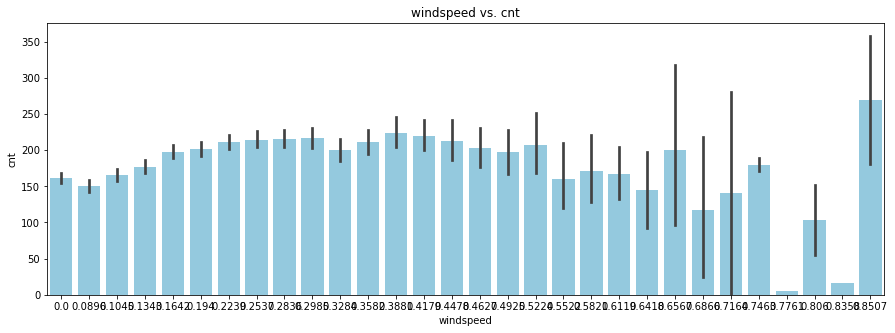

In [11]:
barplots(df_train, 'cnt')

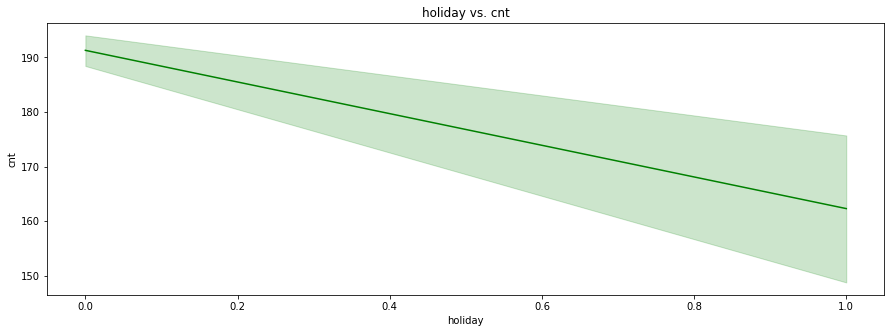

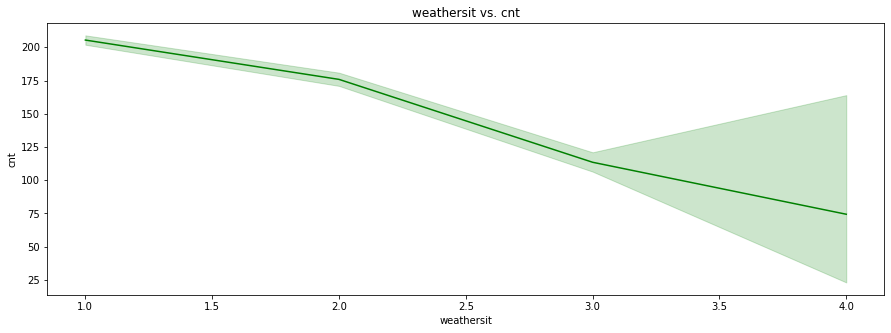

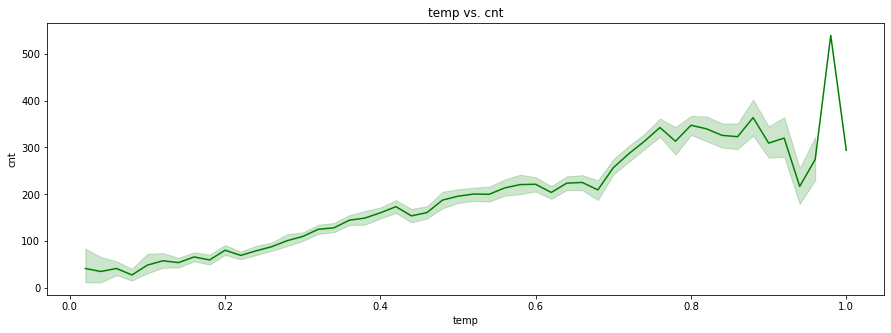

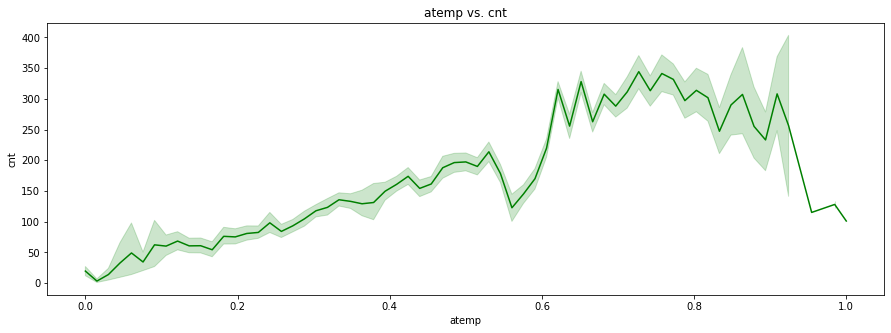

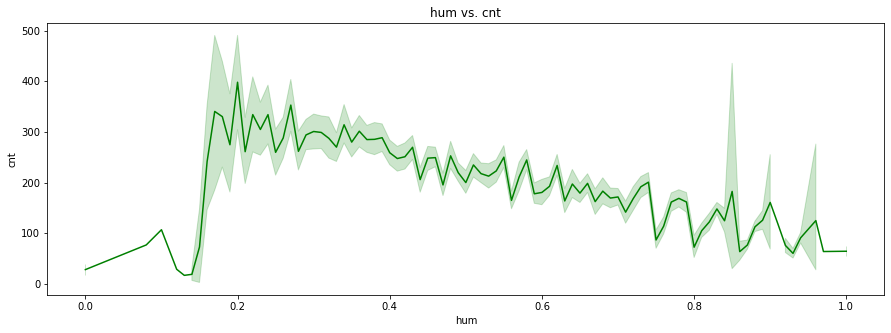

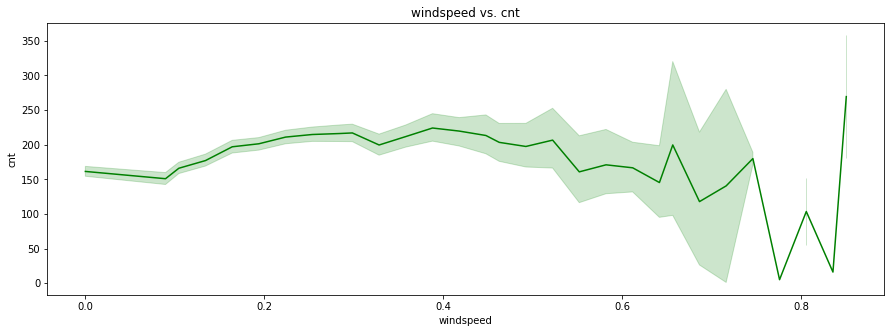

In [12]:
lineplots(df_train, 'cnt')

In de visualisaties kun je zien dat holiday (0) zorgt voor meer verhuuraantallen van het product. Ook zie je dat hoe hoger de weathersite, hoe meer er van het product wordt verhuurd. Ook zie je een stijgende lijn in de temperatuur en de verhuurde aantallen. Windspeed loopt geleidelijk met een paar uitschieters. Hum loopt juist af, dus een lagere hum zorgt voor meer verhuur, maar de hum moet ook weer niet te laag zijn want dan verhuur je bijna niks. 

#ik vind zelf de boxplots niet zo mooi hierbij, wat vinden jullie?


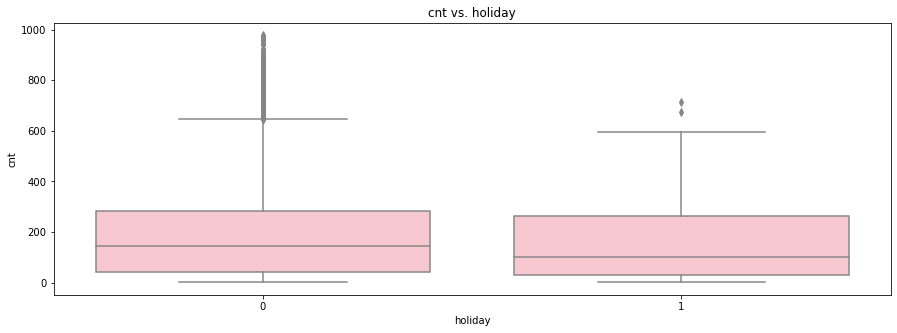

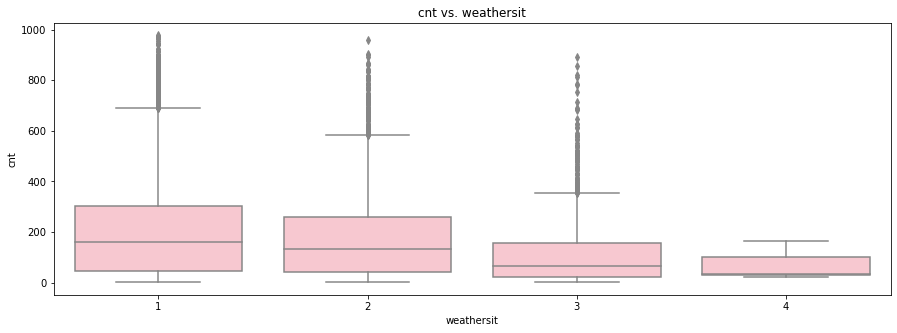

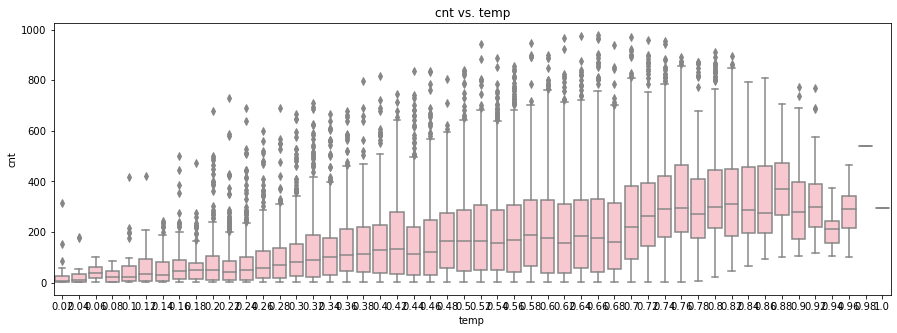

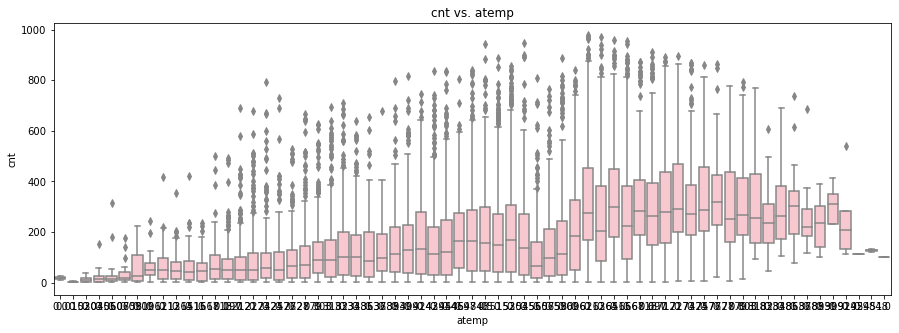

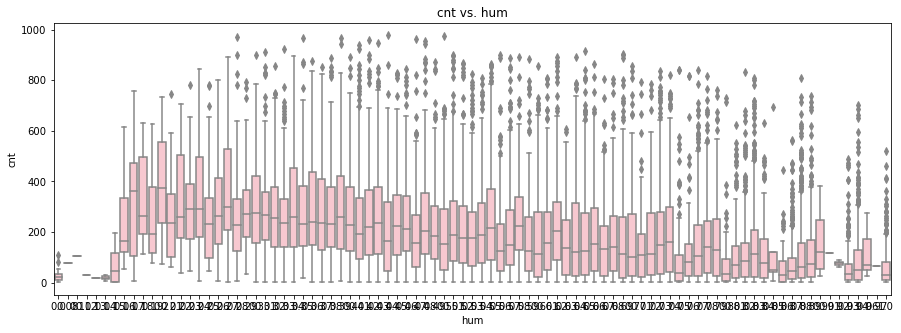

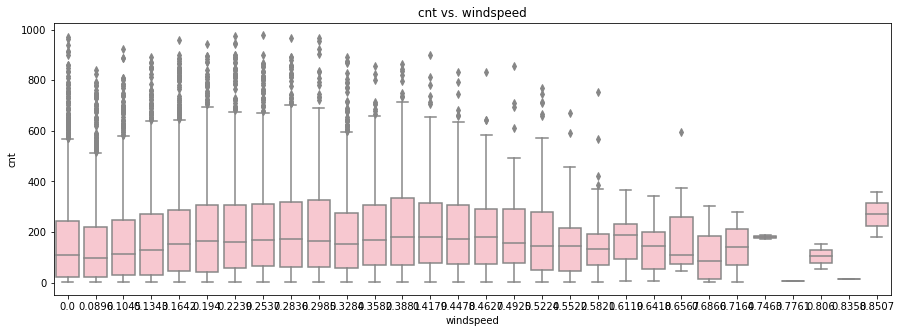

None


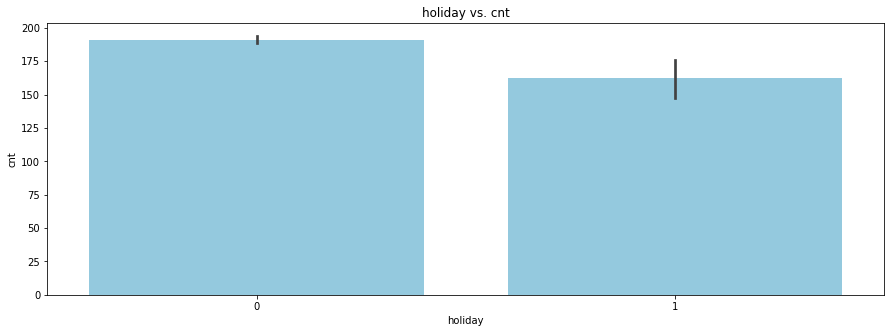

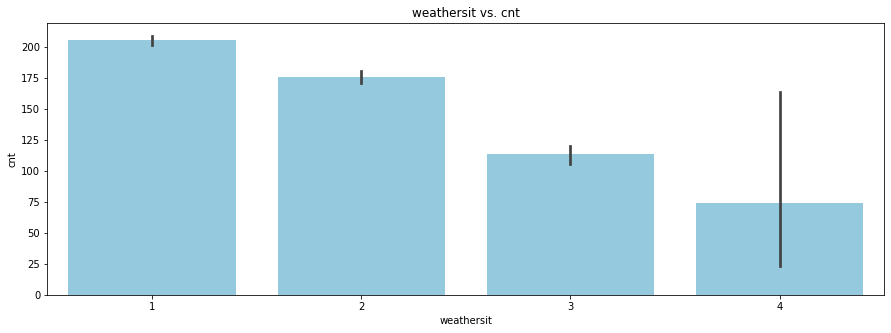

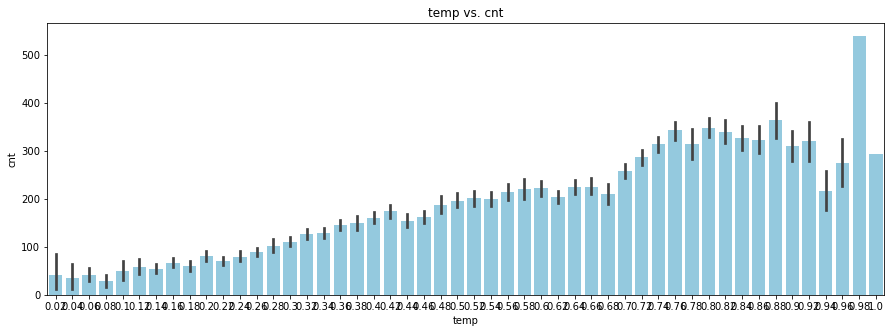

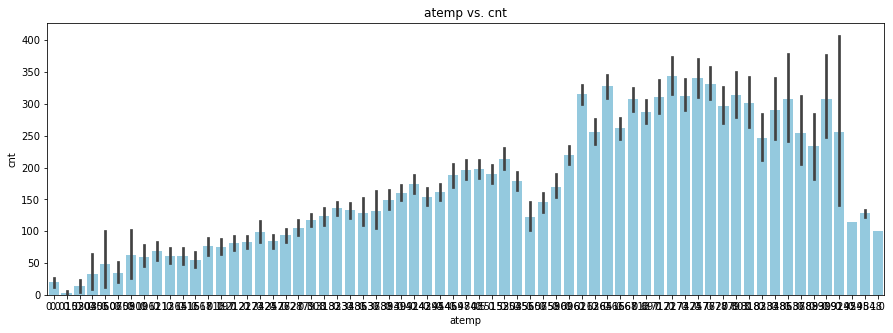

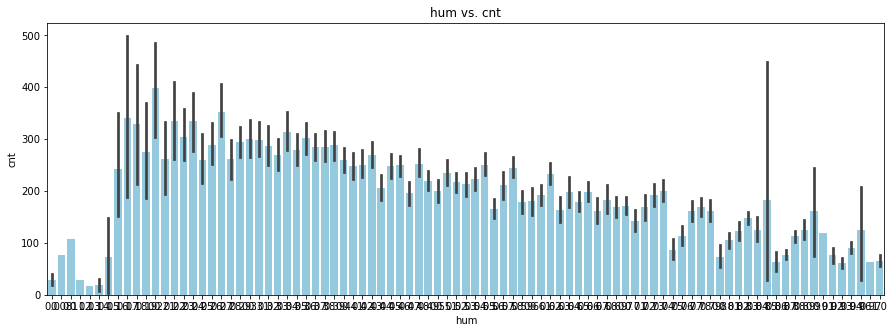

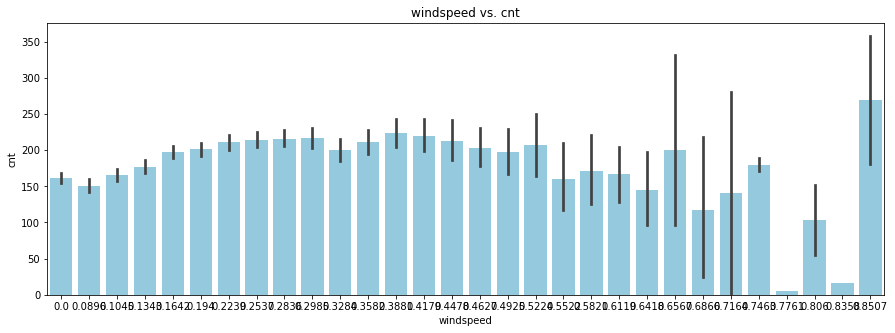

None


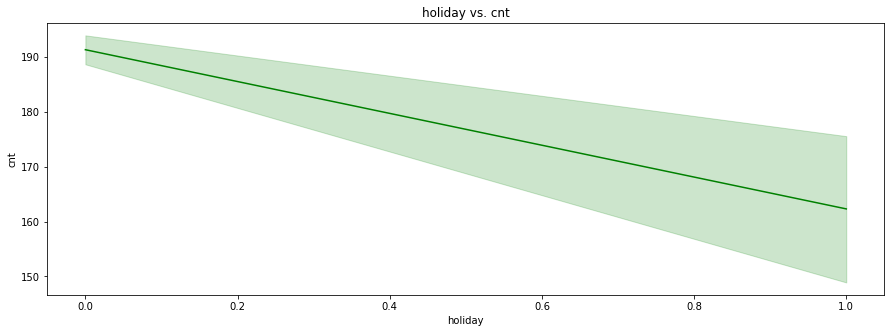

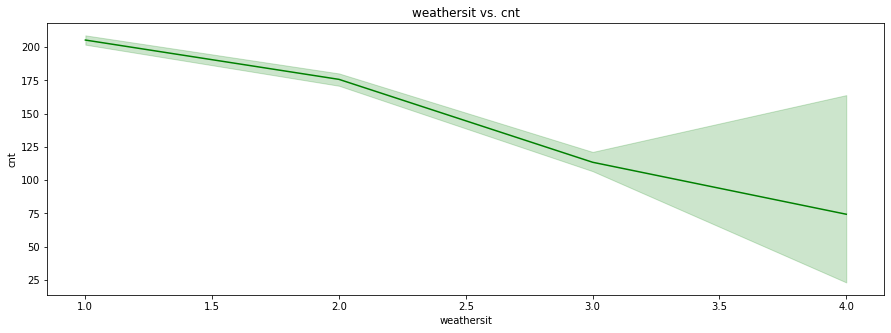

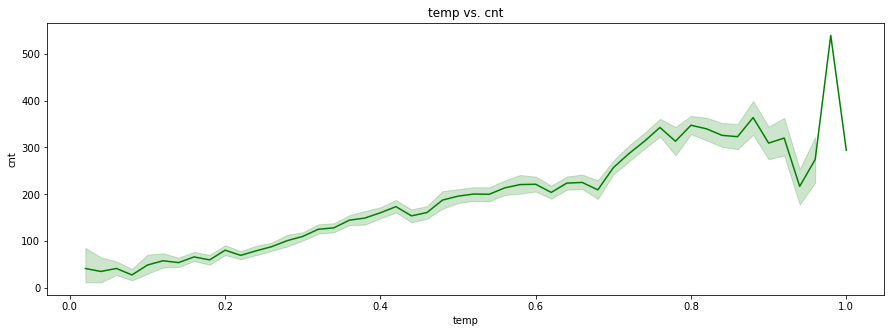

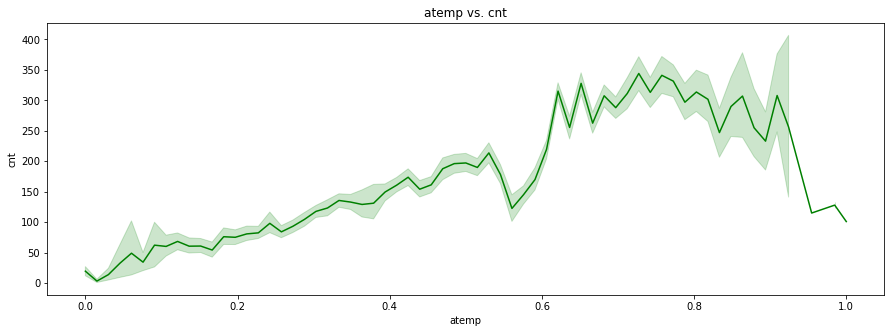

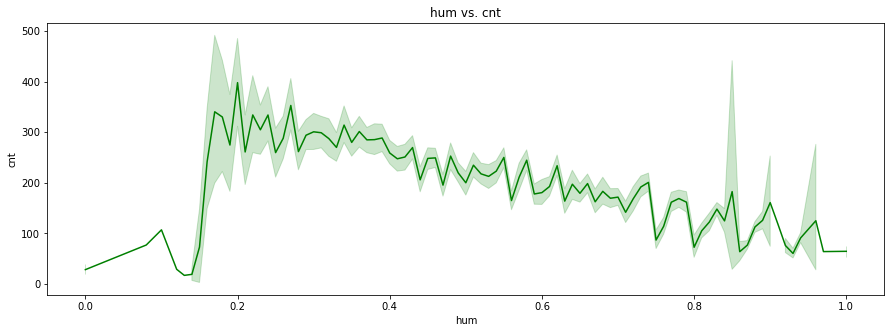

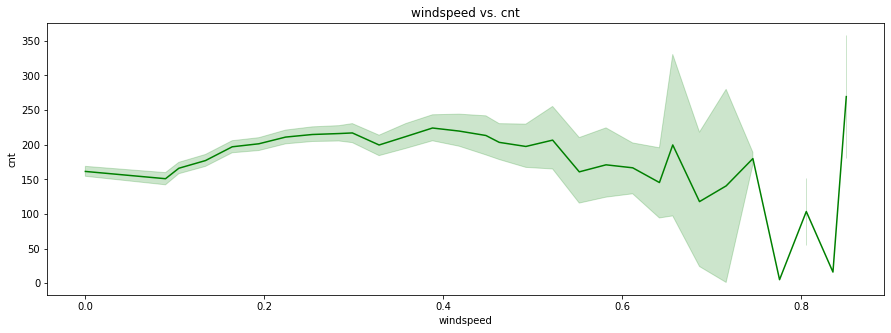

None


In [13]:
print(boxplots(df_train, 'cnt'))
print(barplots(df_train, 'cnt'))
print(lineplots(df_train, 'cnt'))

# Opdracht 3 modelleren

In [15]:
from sklearn.ensemble import RandomForestRegressor
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit


def submissie(model, suffix):
    """
    Deze functie maakt de voorspelling op de test dataset
    en vormt deze om tot een csv bestand om in te kunnen
    leveren op Kaggle.

    Parameters:
    ----------
    model : Machine Learning model
        De naam die is gegeven aan het ML-model dat
        wordt gebruikt om te voorspellen

    suffix : str
        De laatste 'tag' voor de naam van het csv
        bestand, zodat deze makkelijk te identificeren
        is na de submission.

    Returns:
    ----------
    None
        In plaats van een return maakt het een bestand
        aan in de map Kaggle Submissions. De namen zien
        er als volgt uit:

    """
    # Fitten, voorspellen en veranderen naar integer
    y_pred = model.fit(X_train, y_train).predict(df_test)
    y_pred = y_pred.astype(int)

    # Aanmaken df met alleen p_id en Outcome
    test_predictions_df = pd.DataFrame(
        {'date_hour': data_test['date_hour'],
        'cnt': y_pred})
    
    # Aanmaken van tijd
    tijd = datetime.datetime.now().strftime("%m%d%H%M%S")

    # Aanmaken csv bestand met timestamp
    test_predictions_df.to_csv(
        f'Kaggle Submissions/vs_{suffix}_{tijd}.csv',
        index=False)
    
    # print voor conformatie
    print(f'vs_{suffix}_{tijd}.csv has been saved!')

def model_score(model):
    """
    Een functie die de scores voor een model
    berekend en deze toont.

    Parameters:
    ----------
    model : elk ML model
    De naam van het gemaakte ML model

    Returns:
    ----------
    f1 : int
    De f1 score van het gegeven model
    """

    # Fitten en voorspellen met model
    y_pred = model.fit(X_train, y_train).predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Tonen van de resultaten
    return print(f'Root Mean Squared Error: {rmse}')

def grid_score(estimator, param_grid):
    """
    Een functie die de scores voor een grid search
    berekend en deze toont. Hierbij worden ook de
    optimale parameters getoont.

    Parameters:
    ----------
    estimator : ML model
    Het model waarop de grid search wordt toegepast

    param_grid : dict
    Een dictionary waarbij de keys parameter namen
    zijn van het model en de values verschillende
    waarden die de parameter aan kan nemen.

    Returns:
    ----------
    None
    Returned twee prints met de optimale parameters
    en beste f1 score
    """

    # Uitvoeren van de grid search
    gs = GridSearchCV(estimator=estimator,
                    param_grid=param_grid,
                    cv=cv,
                    scoring='neg_root_mean_squared_error',
                    n_jobs=-1)
    
    # Fitten van de grid search
    gs.fit(X_train, y_train)

    # Tonen van de beste score en parameters
    print(f"Beste RMSE: {abs(gs.best_score_)}")
    print(f"Beste parameters:\n{gs.best_params_}")

def feature_scan(model):
    """
    Een functie die een grafie met de feature importances kan maken.
    Dit werkt in ieder geval voor de RF en XGB modellen.

    Parameters:
    ----------
    model : ML-model
    Het model waarvan je de feature importances wilt tonen.

    Returns:
    ----------
    None
    Laat een grafiek zien met daarin de invloed van alle features.
    """
    # Aanmaken en sorteren invloed kolommen
    invloed = pd.Series(model.feature_importances_, index=X.columns)
    invloed = invloed.sort_values(ascending=True)

    # Plotten grafiek met invloed
    invloed.plot(kind='barh', figsize=(10, 6))
    plt.ylabel('Features')
    plt.xlabel('Invloed')
    plt.show()
    

In [16]:
from sklearn.model_selection import train_test_split

X = df_train.drop('cnt', axis=1)
y = df_train['cnt']

# Toepassen van train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    test_size=0.2)

cv = TimeSeriesSplit(n_splits=5, test_size=456)

### **H3.1: Lineaire Regressie** <a name='h3.1'></a>

#### **De werking van lineaire regressie** 
De waarde van een afhankelijke variabele voorspellen op basis van een of meer onafhankelijke variabelen. De formule van lineare regressie is y = b0 + b1x. b0 is het snijpunt met de y-as, b1 is de helling van de lijn, x is de onafhankelijke variabele en y is de afhankelijke variabele. (pp uit de lessen)


#### **Loss functie**

Een loss functie is een manier om te meten hoe goed een lineair regressiemodel de gegevens beschrijft. Het is een functie die de fout of afwijking tussen de werkelijke uitvoer en de voorspelde uitvoer kwantificeert. Een veel gebruikte loss functie voor lineaire regressie is de mean squared error (MSE) functie, die het gemiddelde van de kwadraten van de fouten berekent. Hoe kleiner de MSE, hoe beter het model de gegevens past. Voor deze opdracht gebruiken wij de root mean squared error (RMSE). 

De formule is als volgt:   $RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2}$ 

waar N: aantal waarnemingen is, i: de index, y_i: true labels en ^y_i: predicted labels is

(notebook loss_functions)

#### **Regularisatie**

De vorm van regularisatie die van toepassing is op logistic regression is de L1 en L2 regularisatie. Ook wel de Lasso (L1) en ridge (L2) regularisatie genoemd. Door regularisatie toe te passen, wordt een complex model tijdens het trainen vereenvoudigd. L1 voegt de “absolute waarde van de grootte” (“absolute value of magnitude”) van de coëfficiënt als penalty term toe aan de loss-functie. L2 voegt de “kwadratische omvang” (“squared magnitude”) van de coëfficiënt als penalty term toe aan de loss-functie. (Nagpal, 2022)

**Lasso (L1)**<br>
Wiskundige formule voor L1 is:
$\lambda||w||_1$

Waarbij:
- $w$ : L1-norm van de gewichtsvector
- $\lambda$ : de regularisatieparameter

Lasso (ook bekend als L1-regularisatie) voegt een term toe aan de loss functie die in gelijke verhouding staat tot de absolute waarden van de gewichten. Het effect dat Lasso heeft is dat het sommige gewichten reduceert to nul. Hierdoor worden sommige kenmerken volledig genegeeerd, waardoor feature selectie mogelijk wordt gemaakt. Door middel van feature selectie wordt de kans op overfitting verminderd. (Jain, 2023; Team, 2020)

**Ridge (L2)**<br>
De Wiskundige formule voor L2 is:
$\lambda w^2$

Waarbij:
- $w$ : L2-norm van de gewichtsvector
- $\lambda$ : de regularisatieparameter

Ridge (ook bekend als L2-regularisatie) voegt een term toe aan de loss functie die in gelijke verhouding staat tot de kwadraten van de gewichten. Het effect dat Ridge heeft is dat het de waarden van gewichten dicht naar de nul brengt, maar niet nul maakt. De ridge manier gaat de mogelijke overfitting tegen door te zorgen dat de gewichten geen te grootte waarden kunnen aannemen. (Jain, 2023; Team, 2020)


Nu het duidelijk is wat lineaire Regressie inhoud, kan er een model worden opgesteld.

In [ ]:
# het deel over regularisatie heb ik gekopieerd en geplakt uit opdracht 1. Is dat ok of moet ik het even anders schrijven?

In [17]:
from sklearn.linear_model import LinearRegression

modellr = LinearRegression()
modellr.fit(X_train, y_train)

y_pred = modellr.predict(X_test)

model_score(modellr)

Root Mean Squared Error: 153.13694553894456


In [32]:
param_lr = {
    'fit_intercept': [True, False],
    'copy_X' : [True, False],
    'n_jobs' : [None, -1, 1],
    'positive' : [False, True]
}

 
# Uitvoeren van Grid Search CV
grid_score(modellr, param_lr)

Beste RMSE: 155.18149956174994
Beste parameters:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


### **H3.2: Decision tree regressor** <a name='h3.1'></a>


De Decision Tree Regressor wordt, in tegenstelling tot de Decision Tree Classifier, gebruikt voor regressieproblemen. Een Decision Tree is opgebouwd uit verschillende knooppunten (nodes). De wortel (root node) is het startknooppunt van de boom en bevat alle beschikbare data. De wortel wordt vervolgens gesplitst in twee interne knooppunten (internal nodes) op basis van een bepaald kenmerk en drempelwaarde. Elke interne knoop vertegenwoordigt een beslissingspunt waar de boom bepaalt welke richting te volgen op basis van de kenmerken van de gegeven datapunten. Elk intern knooppunt wordt op zijn beurt weer gesplitst in twee, hetzij in andere interne knooppunten, hetzij in bladeren (leaf nodes). Deze splitsingen worden herhaald totdat de boom de bladeren bereikt. Een blad is het uiteindelijke niveau van de boom en vertegenwoordigt de voorspelde uitkomst voor de gegeven invoer


*Moet ik het ook nog hebben over gini index en entropy?*


https://campus.datacamp.com/courses/machine-learning-with-tree-based-models-in-python/classification-and-regression-trees?ex=1
https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda

In [28]:
from sklearn.tree import DecisionTreeRegressor

modeldtr = DecisionTreeRegressor(random_state=42)  
modeldtr.fit(X_train, y_train)
y_pred = modeldtr.predict(X_test)

model_score(modeldtr)

Root Mean Squared Error: 187.47646987206872


In [30]:
param_dtr = {
    'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'random_state': [42]
}
    
# Uitvoeren van Grid Search CV
grid_score(modeldtr, param_dtr)


KeyboardInterrupt



In [35]:
param_dtr = {
    'criterion': ['squared_error', 'friedman_mse'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'auto'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.1],
}

# Uitvoeren van Grid Search CV
grid_score(modeldtr, param_dtr)

Beste RMSE: 152.01994806730488
Beste parameters:
{'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2}


C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
960 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
656 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Gebruiker\anac

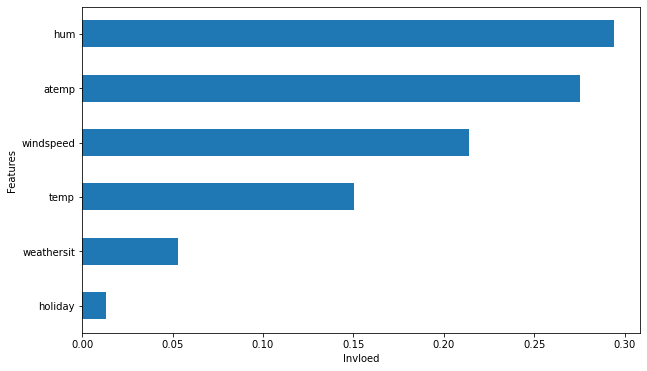

In [54]:
feature_scan(modeldtr)

# autocorrelatie

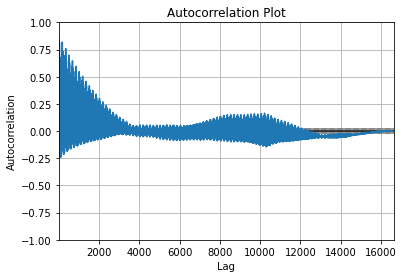

In [19]:
# Importeer de benodigde bibliotheken
import pandas as pd
import matplotlib.pyplot as plt

ts = pd.Series(data_train['cnt'])

# Gebruik autocorrelation_plot om de autocorrelatie te visualiseren
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ts)
plt.title("Autocorrelation Plot")
plt.show()


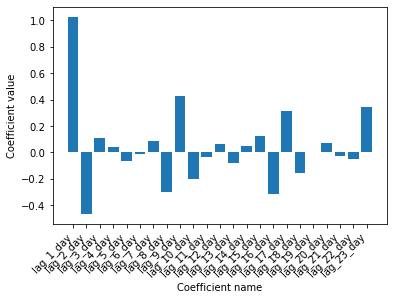

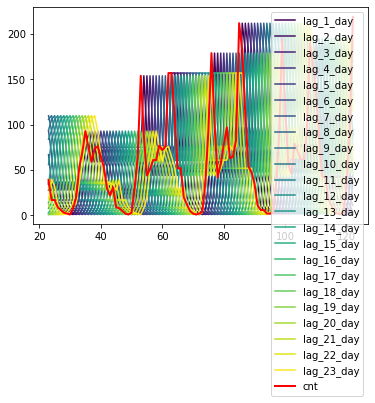

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# These are the "time lags"
shifts = np.arange(1, 24).astype(int)

# Use a dictionary comprehension to create name: value pairs, one pair per shift
shifted_data = {"lag_{}_day".format(day_shift): data_train['cnt'].shift(day_shift) for day_shift in shifts}

# Convert into a DataFrame for subsequent use
data_train_shifted_data = pd.DataFrame(shifted_data)

# Drop rows with NaN values introduced by the shift operation
data_train_shifted_data.dropna(inplace=True)

# Assuming 'target_variable' is the column you want to predict
target_variable = data_train['cnt'].iloc[data_train_shifted_data.index]

model = LinearRegression() 
model.fit(data_train_shifted_data, target_variable)

fig, ax = plt.subplots()
ax.bar(data_train_shifted_data.columns, model.coef_)
ax.set(xlabel='Coefficient name', ylabel='Coefficient value')
# Set formatting so it looks nice
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Plot the first 100 samples of each
ax = data_train_shifted_data.iloc[:100].plot(cmap=plt.cm.viridis)
target_variable.iloc[:100].plot(color='r', lw=2)
ax.legend(loc='best')
plt.show()


In [24]:
def autocorrelatie(df, target_value, model):
    shifts = np.arange(1, 24).astype(int)
    
    shifted_data = {"lag_{}_day".format(day_shift): df[target_value].shift(day_shift) for day_shift in shifts}

    data_train_shifted_data = pd.DataFrame(shifted_data)
    
    target_variable = df[target_value].iloc[data_train_shifted_data.index]

    model.fit(data_train_shifted_data, target_variable)
    
    fig, ax = plt.subplots()
    ax.bar(data_train_shifted_data.columns, model.coef_)
    ax.set(xlabel='Coefficient name', ylabel='Coefficient value')
    # Set formatting so it looks nice
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Plot the first 100 samples of each
    ax = data_train_shifted_data.iloc[:100].plot(cmap=plt.cm.viridis)
    target_variable.iloc[:100].plot(color='r', lw=2)
    ax.legend(loc='best')
    plt.show()

In [27]:
autocorrelatie(df_train, 'cnt', modellr)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# sarimax


Sarimax is een tijdserie model en de afkorting staat voor Seasonal AutoRegresive Integrated Moving Avarege eXogenous.

In [36]:
import statsmodels.api as sm

# x is je tijdsreeksgegevens

# Definieer de SARIMA parameters
order = (p, d, q)
seasonal_order = (P, D, Q, s)

# Maak en pas het SARIMA-model toe
sarima_model = sm.tsa.SARIMAX(x, order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

# Bekijk de samenvatting van het model
print(sarima_result.summary())


NameError: name 'p' is not defined

In [47]:
import pmdarima as pm
results = pm.auto_arima( df_train,# data  
                         # non-seasonal arguments 
                        seasonal=True,  # is the time series seasonal  
                        m=7,            # the seasonal period   
                        D=1,            # seasonal difference order   
                        start_P=1,      # initial guess for P           
                        start_Q=1,      # initial guess for Q            
                        max_P=2,        # max value of P to test       
                        max_Q=2,        # max value of Q to test                        
                       )


ValueError: y should be a 1d array, got an array of shape (16637, 7) instead.

In [48]:
# Load the statsmodels api
import statsmodels.api as sm

# Load your dataset
endog = df_train

# We could fit an AR(2) model, described above
mod_ar2 = sm.tsa.SARIMAX(endog, order=(2,0,0))
# Note that mod_ar2 is an instance of the SARIMAX class

# Fit the model via maximum likelihood
res_ar2 = mod_ar2.fit()
# Note that res_ar2 is an instance of the SARIMAXResults class

# Show the summary of results
print(res_ar2.summary())

# We could also fit a more complicated model with seasonal components.
# As an example, here is an SARIMA(1,1,1) x (0,1,1,4):
mod_sarimax = sm.tsa.SARIMAX(endog, order=(1,1,1),
                             seasonal_order=(0,1,1,4))
res_sarimax = mod_sarimax.fit()

# Show the summary of results
print(res_sarimax.summary())


ValueError: SARIMAX models require univariate `endog`. Got shape (16637, 7).

In [38]:
pip install pmdarima


In [40]:

from pmdarima import auto_arima

# x is je tijdsreeksgegevens
sarima_model = auto_arima(X, seasonal=True, m=12)  # m is de lengte van het seizoen
print(sarima_model.summary())

ValueError: y should be a 1d array, got an array of shape (16637, 6) instead.

C:\Users\Gebruiker\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


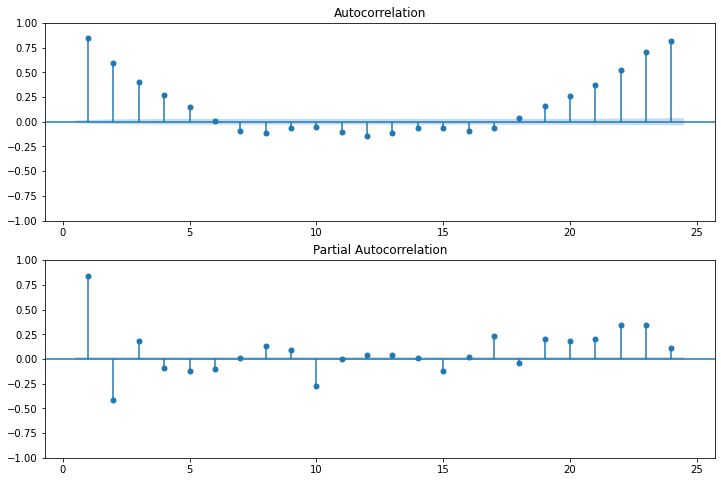

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df_store_2_item_28_timeon ax1
plot_acf(df_train['cnt'],lags=24, zero=False, ax=ax1)

# Plot the PACF of df_store_2_item_28_timeon ax2
plot_pacf(df_train['cnt'],lags=24, zero=False, ax=ax2)

plt.show()

ValueError: x is required to have ndim 1 but has ndim 2

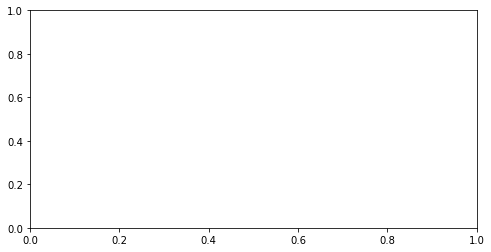

In [43]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming df_train is your time series data
# Create figure
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# Plot ACF
sm.graphics.tsa.plot_acf(df_train, ax=ax, lags=25, zero=False)

plt.show()


In [55]:
#ets

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Voorbeeld ETS-model
model = ExponentialSmoothing(df_train['cnt'], seasonal='add', trend='add', seasonal_periods=12)
results = model.fit()


C:\Users\Gebruiker\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
